In [16]:
import numpy as np

from sklearn.model_selection import train_test_split

from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

import tensorflow as tf

In [2]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
X = np.load("/content/drive/MyDrive/Collab/DMPA Project/X.npy")
y = np.load("/content/drive/MyDrive/Collab/DMPA Project/y.npy")

In [3]:
X.shape

(3064,)

In [4]:
uni = []

for i,j in enumerate(X):
    if X[i].shape[0]==256:
        uni.append(i)
    else:
        X[i] = X[i].reshape((512,512,1))

while 1:    
    if len(uni)==0:
        break
    i = uni.pop()

    X = np.delete(X,i)
    y = np.delete(y,i)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3) 

In [6]:
X = None
y = None

In [7]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2744,) (2744, 3)
(305,) (305, 3)


In [8]:
X_train[0].shape

(512, 512, 1)

In [10]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [11]:
X_train.shape

(2744, 512, 512, 1)

In [12]:
train_generator = ImageDataGenerator(rotation_range=180, horizontal_flip=True, shear_range=0.2, zoom_range=.4)
test_generator = ImageDataGenerator(rescale=1./1.)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train) 
test_generator.fit(X_test)

In [13]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(512,512,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,))) #3-->1
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(3))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [14]:
#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 96)      11712     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 96)     384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 256)      1

In [17]:
AlexNet.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [18]:
batch_size = 32
epochs = 10

In [26]:
history = AlexNet.fit(train_generator.flow(X_train, y_train, batch_size = batch_size),
                     epochs = epochs, 
                     steps_per_epoch = X_train.shape[0]//batch_size,
                     validation_data = test_generator.flow(X_test, y_test, batch_size = batch_size), 
                     validation_steps = X_test.shape[0]//batch_size,
                     verbose = 1)#SGD(lr=0.0001, momentum=0.9) from tensorflow.keras.optimizers import SGD

Epoch 1/10
85/85 [==============================] - 79s 757ms/step - loss: 0.7791 - accuracy: 0.6508 - val_loss: 2.7012 - val_accuracy: 0.6389
Epoch 2/10
85/85 [==============================] - 62s 724ms/step - loss: 0.6057 - accuracy: 0.7655 - val_loss: 1.9358 - val_accuracy: 0.3958
Epoch 3/10
85/85 [==============================] - 61s 719ms/step - loss: 0.5378 - accuracy: 0.7935 - val_loss: 0.6326 - val_accuracy: 0.7014
Epoch 4/10
85/85 [==============================] - 62s 723ms/step - loss: 0.5062 - accuracy: 0.8116 - val_loss: 0.5019 - val_accuracy: 0.8021
Epoch 5/10
85/85 [==============================] - 61s 709ms/step - loss: 0.4580 - accuracy: 0.8311 - val_loss: 0.7497 - val_accuracy: 0.6875
Epoch 6/10
85/85 [==============================] - 61s 710ms/step - loss: 0.4563 - accuracy: 0.8285 - val_loss: 1.6684 - val_accuracy: 0.5000
Epoch 7/10
85/85 [==============================] - 60s 707ms/step - loss: 0.4283 - accuracy: 0.8359 - val_loss: 1.9712 - val_accuracy: 0.5451

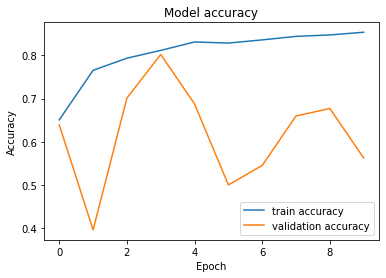

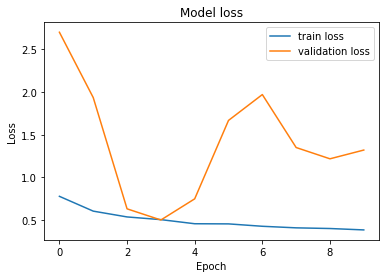

In [28]:
import matplotlib.pyplot as plt 
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = AlexNet.predict(X_test, verbose=1)
accuracy_score(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))

10/10 [==============================] - 1s 124ms/step


0.5639344262295082